In [24]:
# Import necessary libraries
import cv2
import numpy as np

def pad_image(image, padding_size):
    height, width = image.shape
    padded_image = np.zeros((height + 2 * padding_size, width + 2 * padding_size), dtype=np.uint8)
    padded_image[padding_size:padding_size + height, padding_size:padding_size + width] = image
    return padded_image

def linear_filter(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    height, width = image.shape
    result = np.zeros_like(image)
    for i in range(padding_size, height + padding_size):
        for j in range(padding_size, width + padding_size):
            sum_val = np.sum(padded_image[i - padding_size:i + padding_size + 1, j - padding_size:j + padding_size + 1] * kernel)
            result[i - padding_size, j - padding_size] = sum_val
    return result

# Read an image
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Define a kernel for blurring
blur_kernel = np.array([[1, 1, 1],
                        [1, 1, 1],
                        [1, 1, 1]]) / 9

# Define a kernel for edge detection (Laplacian)
edge_kernel = np.array([[0, 1, 0],
                        [1, -4, 1],
                        [0, 1, 0]])

# Apply linear filtering (blurring)
# blurred_image = linear_filter(image, blur_kernel)

# Apply linear filtering (edge detection)
edge_detected_image = linear_filter(image, edge_kernel)

# Display the original and processed images
cv2.imshow('Original Image', image)
# cv2.imshow('Blurred Image', blurred_image)
cv2.imshow('Edge Detected Image', edge_detected_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [21]:
# Function to pad the image with zeros
def pad_image(image, padding_size):
    padded_image = []
    height, width = len(image), len(image[0])
    for i in range(height + 2 * padding_size):
        row = []
        for j in range(width + 2 * padding_size):
            if padding_size <= i < height + padding_size and padding_size <= j < width + padding_size:
                row.append(image[i - padding_size][j - padding_size])
            else:
                row.append(0)
        padded_image.append(row)
    return padded_image

# Function to perform linear spatial filtering (Convolution)
def convolution(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    height, width = len(image), len(image[0])
    result = [[0] * width for _ in range(height)]
    for i in range(height):
        for j in range(width):
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    result[i][j] += padded_image[i + ki][j + kj] * kernel[ki][kj]
    return result

# Function to perform spatial correlation
def correlation(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    height, width = len(image), len(image[0])
    result = [[0] * width for _ in range(height)]
    for i in range(height):
        for j in range(width):
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    result[i][j] += padded_image[i + ki][j + kj] * kernel[-(ki + 1)][-(kj + 1)]
    return result

# Import necessary libraries
import cv2
import numpy as np

# Load an image
image = cv2.imread('sunflower.jpg', cv2.IMREAD_GRAYSCALE)

# Display the original image
cv2.imshow('Original Image', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Example kernel for blurring
blur_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Perform convolution (linear spatial filtering)
convolution_result = convolution(image.tolist(), blur_kernel)

# Convert the result back to numpy array
convolution_result = np.array(convolution_result, dtype=np.uint8)

# Display the convolved image
cv2.imshow('Convolution Result', convolution_result)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Example kernel for blurring
blur_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Perform correlation (spatial correlation)
correlation_result = correlation(image.tolist(), blur_kernel)

# Convert the result back to numpy array
correlation_result = np.array(correlation_result, dtype=np.uint8)

# Display the correlated image
cv2.imshow('Correlation Result', correlation_result)
cv2.waitKey(0)
cv2.destroyAllWindows()


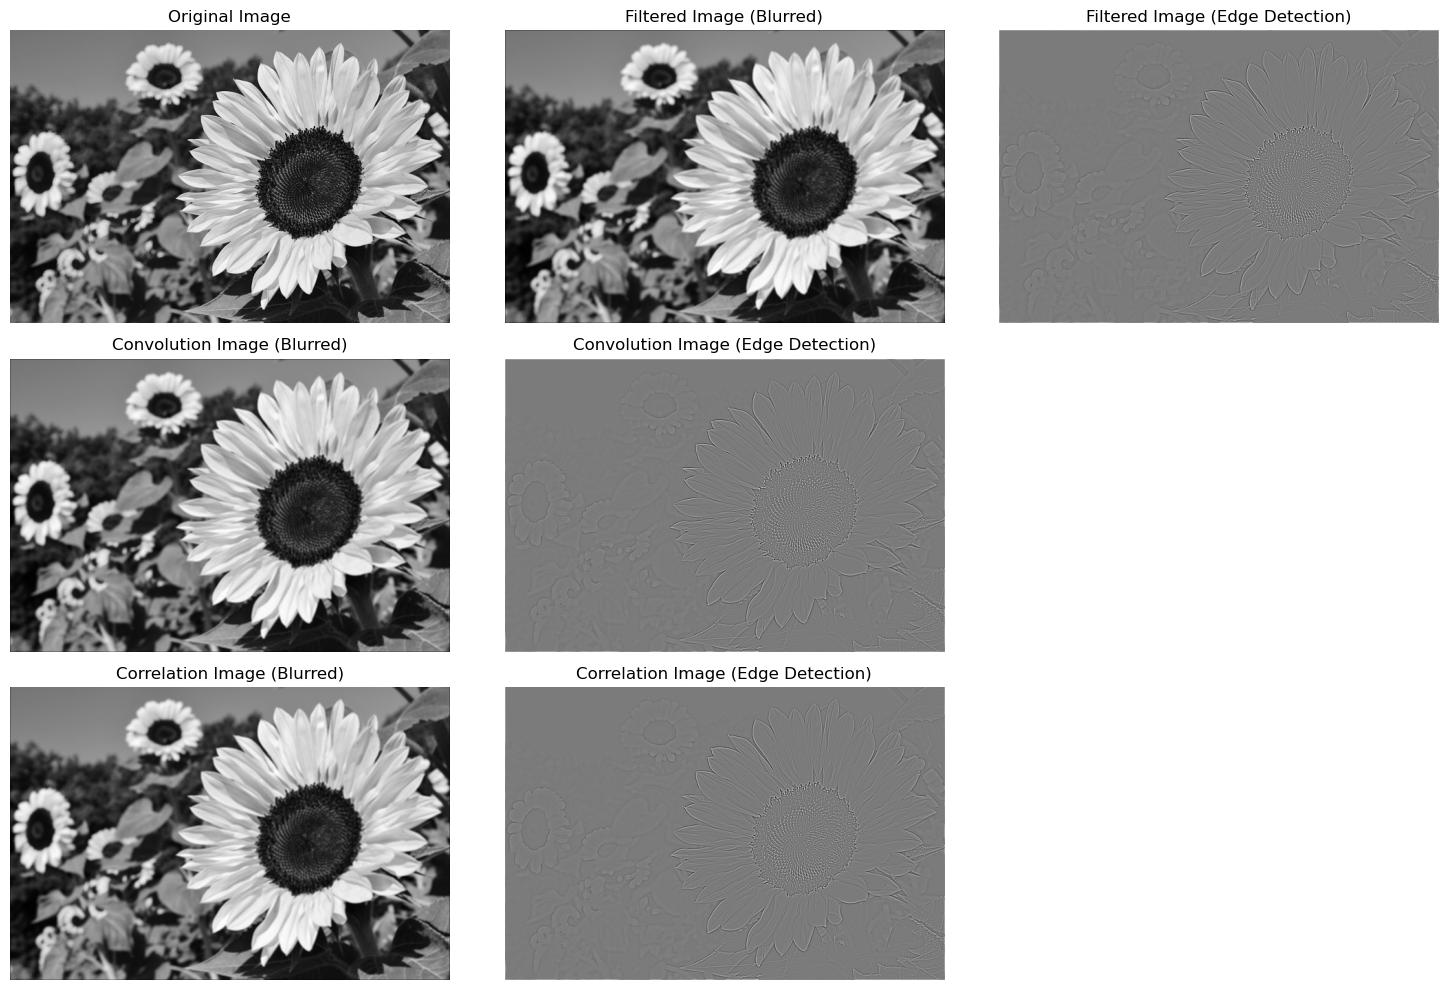

In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def pad_image(image, padding_size):
    padded_image = []
    for i in range(len(image) + 2 * padding_size):
        row = []
        for j in range(len(image[0]) + 2 * padding_size):
            if padding_size <= i < len(image) + padding_size and padding_size <= j < len(image[0]) + padding_size:
                row.append(image[i - padding_size][j - padding_size])
            else:
                row.append(0)
        padded_image.append(row)
    return padded_image

def linear_filter(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    result = []
    for i in range(len(image)):
        row = []
        for j in range(len(image[0])):
            sum_val = 0
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    sum_val += padded_image[i + ki][j + kj] * kernel[ki][kj]
            row.append(sum_val)
        result.append(row)
    return result

def convolution(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    result = []
    for i in range(len(image)):
        row = []
        for j in range(len(image[0])):
            sum_val = 0
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    sum_val += padded_image[i + ki][j + kj] * kernel[ki][kj]
            row.append(sum_val)
        result.append(row)
    return result

def correlation(image, kernel):
    padding_size = len(kernel) // 2
    padded_image = pad_image(image, padding_size)
    result = []
    for i in range(len(image)):
        row = []
        for j in range(len(image[0])):
            sum_val = 0
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    sum_val += padded_image[i + ki][j + kj] * kernel[-(ki + 1)][-(kj + 1)]
            row.append(sum_val)
        result.append(row)
    return result

# Example usage:
image = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
]

# Example kernel for blurring
blur_kernel = [
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]
]

# Example kernel for edge detection
edge_kernel = [
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
]

# Load the image
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Perform linear filtering (convolution)
filtered_image_blur = linear_filter(image, blur_kernel)
filtered_image_edge = linear_filter(image, edge_kernel)

# Perform convolution
convolution_image_blur = convolution(image, blur_kernel)
convolution_image_edge = convolution(image, edge_kernel)

# Perform correlation
correlation_image_blur = correlation(image, blur_kernel)
correlation_image_edge = correlation(image, edge_kernel)

# Display the images using Matplotlib
plt.figure(figsize=(15, 10))

plt.subplot(3, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(3, 3, 2)
plt.imshow(filtered_image_blur, cmap='gray')
plt.title('Filtered Image (Blurred)')
plt.axis('off')

plt.subplot(3, 3, 3)
plt.imshow(filtered_image_edge, cmap='gray')
plt.title('Filtered Image (Edge Detection)')
plt.axis('off')

plt.subplot(3, 3, 4)
plt.imshow(convolution_image_blur, cmap='gray')
plt.title('Convolution Image (Blurred)')
plt.axis('off')

plt.subplot(3, 3, 5)
plt.imshow(convolution_image_edge, cmap='gray')
plt.title('Convolution Image (Edge Detection)')
plt.axis('off')

plt.subplot(3, 3, 7)
plt.imshow(correlation_image_blur, cmap='gray')
plt.title('Correlation Image (Blurred)')
plt.axis('off')

plt.subplot(3, 3, 8)
plt.imshow(correlation_image_edge, cmap='gray')
plt.title('Correlation Image (Edge Detection)')
plt.axis('off')

plt.tight_layout()
plt.show()


In [14]:
import cv2
import numpy as np

def average_filter(image, kernel_size):
    # Create a kernel with all elements as 1/(kernel_size^2)
    kernel = np.ones((kernel_size, kernel_size), dtype=np.float32) / (kernel_size**2)
    # Perform convolution for each color channel separately
    filtered_image = cv2.merge([cv2.filter2D(image[:,:,0], -1, kernel),
                                cv2.filter2D(image[:,:,1], -1, kernel),
                                cv2.filter2D(image[:,:,2], -1, kernel)])
    return filtered_image

def max_filter(image, kernel_size):
    # Perform maximum filtering for each color channel separately
    filtered_image = cv2.merge([cv2.dilate(image[:,:,0], np.ones((kernel_size, kernel_size), np.uint8)),
                                cv2.dilate(image[:,:,1], np.ones((kernel_size, kernel_size), np.uint8)),
                                cv2.dilate(image[:,:,2], np.ones((kernel_size, kernel_size), np.uint8))])
    return filtered_image

def min_filter(image, kernel_size):
    # Perform minimum filtering for each color channel separately
    filtered_image = cv2.merge([cv2.erode(image[:,:,0], np.ones((kernel_size, kernel_size), np.uint8)),
                                cv2.erode(image[:,:,1], np.ones((kernel_size, kernel_size), np.uint8)),
                                cv2.erode(image[:,:,2], np.ones((kernel_size, kernel_size), np.uint8))])
    return filtered_image

# Load the image
image_path = 'sunflower.jpg'
image = cv2.imread(image_path)

# Apply average filter
average_filtered_image = average_filter(image, kernel_size=3)

# Apply max filter
max_filtered_image = max_filter(image, kernel_size=3)

# Apply min filter
min_filtered_image = min_filter(image, kernel_size=3)

# Display the images
cv2.imshow('Original Image', image)
cv2.imshow('Average Filtered Image', average_filtered_image.astype(np.uint8))
cv2.imshow('Max Filtered Image', max_filtered_image.astype(np.uint8))
cv2.imshow('Min Filtered Image', min_filtered_image.astype(np.uint8))
cv2.waitKey(0)
cv2.destroyAllWindows()



In [19]:
import cv2
import numpy as np

def first_order_derivative_sharpen(image):
    # Define the kernel for the first-order derivative sharpening filter
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    # Perform convolution
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

def second_order_derivative_sharpen(image):
    # Define the kernel for the second-order derivative sharpening filter (Laplacian)
    kernel = np.array([[0, 1, 0],
                       [1, -4, 1],
                       [0, 1, 0]])
    # Perform convolution
    sharpened_image = cv2.filter2D(image, -1, kernel)
    return sharpened_image

# Load the image
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply first-order derivative sharpening filter
first_order_sharpened_image = first_order_derivative_sharpen(image)

# Apply second-order derivative sharpening filter (Laplacian)
second_order_sharpened_image = second_order_derivative_sharpen(image)

# Display the images
cv2.imshow('Original Image', image)
cv2.imshow('First-Order Derivative Sharpened Image', first_order_sharpened_image)
cv2.imshow('Second-Order Derivative Sharpened Image', second_order_sharpened_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [17]:
import cv2
import numpy as np

def sobel_filter(image):
    # Apply Sobel operator for horizontal and vertical edges
    sobelx = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    sobely = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Combine the gradients to get the magnitude
    magnitude = np.sqrt(sobelx**2 + sobely**2)
    # Convert the magnitude to uint8
    magnitude = np.uint8(magnitude)
    
    return magnitude

# Load the image
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Apply Sobel filtering
sobel_filtered_image = sobel_filter(image)

# Display the images
cv2.imshow('Original Image', image)
cv2.imshow('Sobel Filtered Image', sobel_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [18]:
import cv2
import numpy as np

def gaussian_filter(image, kernel_size, sigma):
    # Create a Gaussian kernel
    kernel = cv2.getGaussianKernel(kernel_size, sigma)
    # Convolve the image with the Gaussian kernel
    filtered_image = cv2.filter2D(image, -1, kernel)
    return filtered_image

# Load the image
image_path = 'sunflower.jpg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Define kernel size and sigma for Gaussian filter
kernel_size = 5
sigma = 1.0

# Apply Gaussian filtering
gaussian_filtered_image = gaussian_filter(image, kernel_size, sigma)

# Display the images
cv2.imshow('Original Image', image)
cv2.imshow('Gaussian Filtered Image', gaussian_filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
